# Generating a simulation Zarr File for 8 phenotypes

In [1]:
from plexus_simulate.simulation_utils import simulate_hawkes_discrete, calcium_dynamics
from plexus_simulate.plotting_utils import plot_calcium_traces, plot_calcium_traces_and_save

import numpy as np
import matplotlib.pyplot as plt
import zarr
from tqdm import tqdm
from oasis.functions import deconvolve

/srv/home/pgrosjean/mambaforge/plexus_simulate/lib/python3.10/site-packages/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


## Example Simulation with 30 nodes

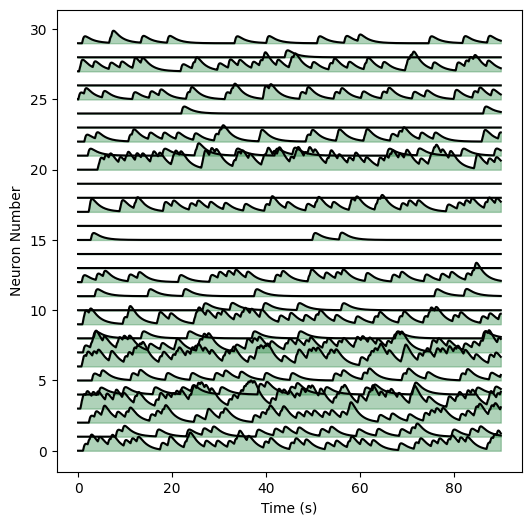

In [2]:
n_nodes = 30
alpha = 2
connectivity=0.4
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
    n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90, delta_t=1/25, mu=0.4, alpha_base=alpha_base,
    beta=2, gamma=0.2, seed=42, t_feedback_beta=2, t_feedback_gamma=5, mu_std=0.9)

CB, C, F = calcium_dynamics(events)
plot_calcium_traces(F, '#398f50', 25)

# Describing unique phenotypes generated in these simulations
phenotypes:
1. Fast hypershychronous activity (high connectivity)
2. Slow hypershychronous activity at D21 (high connectivity)
3. No synaptic strength with fast activity (low connectivity)
4. No synaptic strength with slow activity (low connectivity)
5. Slow activity with synaptic strength (moderate connectivity)
6. Fast activity with low synaptic strength (moderate connectivity)
7. Fast activity with synaptic strength (low connectivity)
8. Low activity with low synaptic strength (low connectivity)

In [3]:
# defining the color palette for plotting
color_palette = ["#003f5c",
                 "#58508d",
                 "#8a508f",
                 "#bc5090",
                 "#de5a79",
                 "#ff6361",
                 "#ff8531",
                 "#ffa600"]

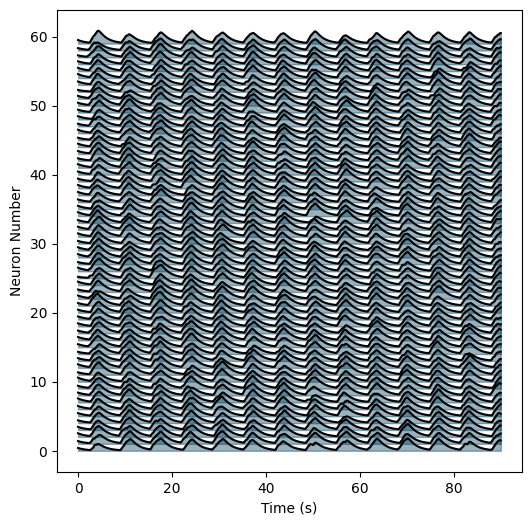

In [4]:
### 1: Fast hypershychronous activity (high connectivity)
n_nodes = 60
alpha = 5
connectivity=1
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
    n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=0.05, alpha_base=alpha_base,
    beta=1.6, gamma=0.2, seed=42, t_feedback_beta=7, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[0], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[0], 25, '../../simulation_plots/simulation_1.pdf')

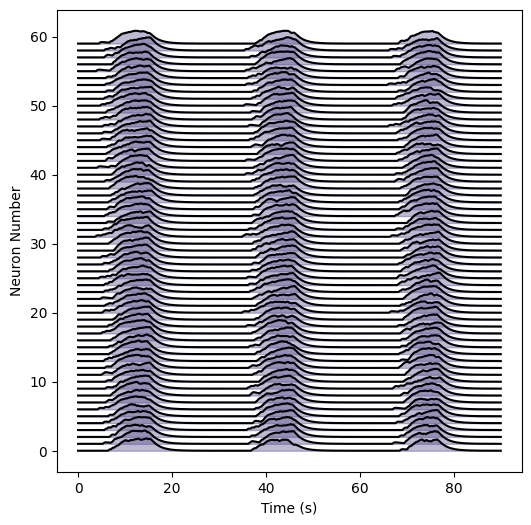

In [5]:
### 2
n_nodes = 60
alpha = 5
connectivity=1.0
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=0.05, alpha_base=alpha_base,
beta=2.0, gamma=0.2, seed=42, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[1], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[1], 25, '../../simulation_plots/simulation_2.pdf')

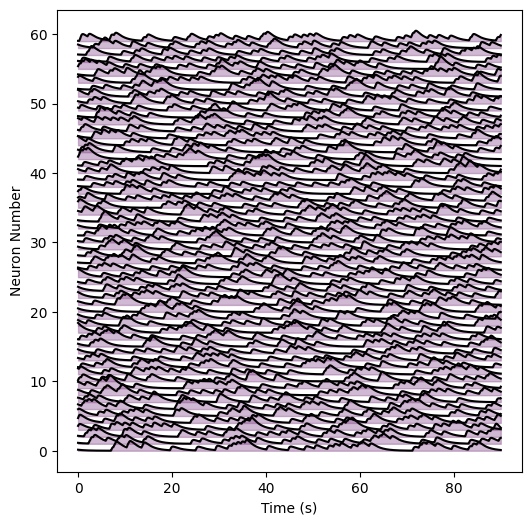

In [6]:
### 3
n_nodes = 60
alpha = 0
connectivity=0.2
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=2, alpha_base=alpha_base,
beta=2.0, gamma=0.2, seed=42, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[2], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[2], 25, '../../simulation_plots/simulation_3.pdf')

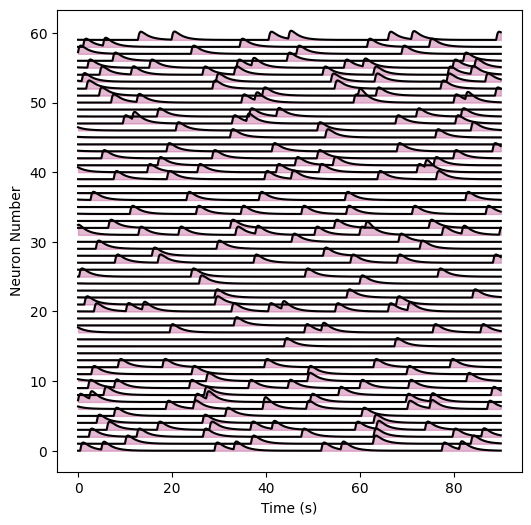

In [7]:
### 4
n_nodes = 60
alpha = 0
connectivity=0.2
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=0.2, alpha_base=alpha_base,
beta=2.0, gamma=0.2, seed=42, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[3], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[3], 25, '../../simulation_plots/simulation_4.pdf')

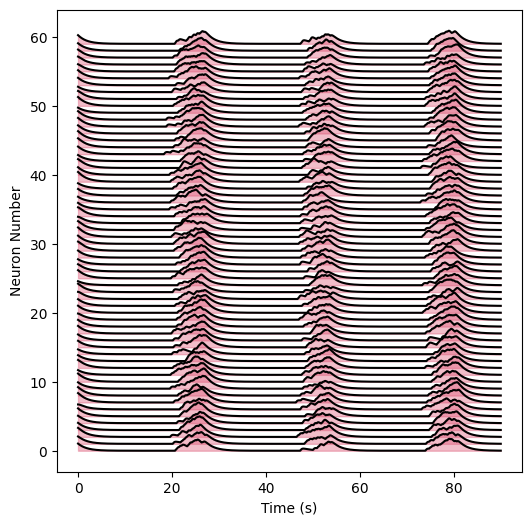

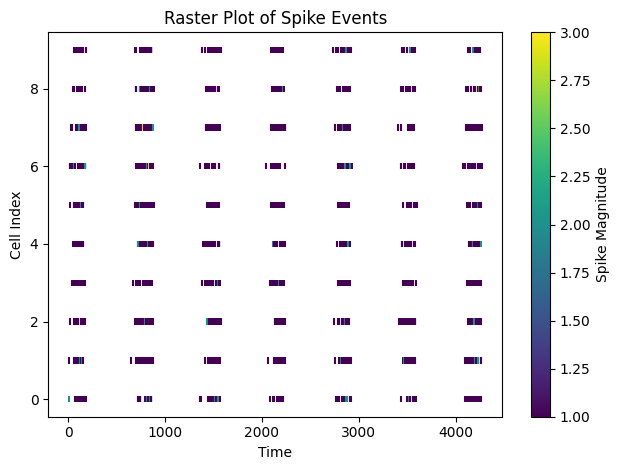

In [8]:
### 5
n_nodes = 60
alpha = 5
connectivity=0.7
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=0.3, alpha_base=alpha_base,
beta=2.0, gamma=0.2, seed=42, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[4], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[4], 25, '../../simulation_plots/simulation_5.pdf')

# Define a function to generate a raster plot
def generate_raster_plot(data):
    """
    Generates a raster plot for spike events.
    
    Parameters
    ----------
    data : ndarray
        Array of shape (num_cells, time), where each entry represents 
        the magnitude of events. Values > 0 are considered spike events.
    
    Returns
    -------
    None
        Displays a raster plot.
    """
    num_cells, time_steps = data.shape
    spike_times = []
    cell_indices = []
    magnitudes = []
    
    # Collect spike information
    for cell in range(num_cells):
        for time in range(time_steps):
            if data[cell, time] > 0:
                spike_times.append(time)
                cell_indices.append(cell)
                magnitudes.append(data[cell, time])
    
    # Create scatter plot for raster
    scatter = plt.scatter(
        spike_times, cell_indices, c=magnitudes, cmap='viridis', s=20, marker='|'
    )
    
    # Add color bar and labels
    plt.colorbar(scatter, label='Spike Magnitude')
    plt.xlabel('Time')
    plt.ylabel('Cell Index')
    plt.title('Raster Plot of Spike Events')
    plt.tight_layout()
    plt.show()

generate_raster_plot(events[:10, :])

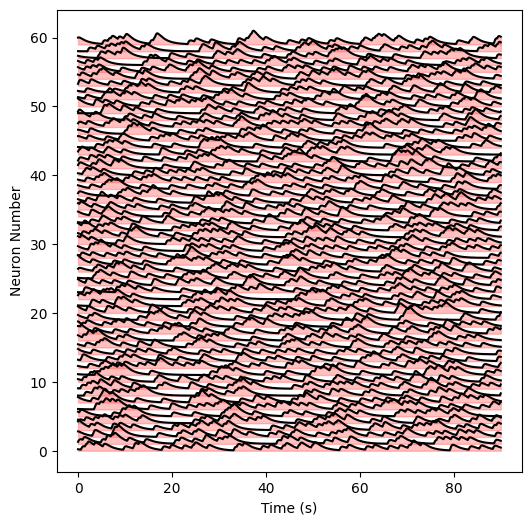

In [9]:
### 6
n_nodes = 60
alpha = 1
connectivity=0.7
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=2, alpha_base=alpha_base,
beta=2.0, gamma=0.2, seed=42, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[5], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[5], 25, '../../simulation_plots/simulation_6.pdf')

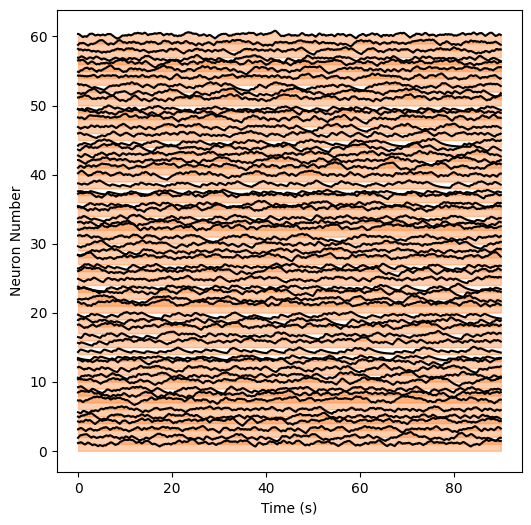

In [10]:
### 7
n_nodes = 60
alpha = 0.05
connectivity=0.3
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=8, alpha_base=alpha_base,
beta=4, gamma=0.3, seed=42, t_feedback_beta=4, t_feedback_gamma=10, mu_std=3)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[6], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[6], 25, '../../simulation_plots/simulation_7.pdf')

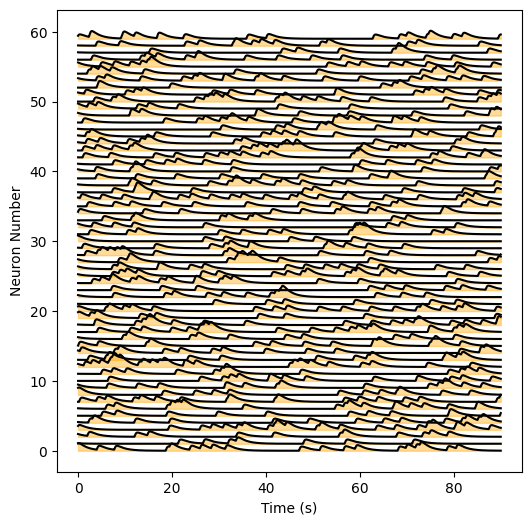

In [11]:
### 8
n_nodes = 60
alpha = 0.9
connectivity=0.4
alpha_base = alpha/n_nodes
events, intensities, graph = simulate_hawkes_discrete(
n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=90*2, delta_t=1/25, mu=0.1, alpha_base=alpha_base,
beta=0.2, gamma=0.01, seed=42, t_feedback_beta=1, t_feedback_gamma=1, mu_std=0.02)
CB, C, F = calcium_dynamics(events)
# Starting from 90 seconds to avoid the initial transients in the simulation
start_idx = 90*25
plot_calcium_traces(F[:, start_idx:], color_palette[7], 25)
## Uncomment below to save the plot
# plot_calcium_traces_and_save(F[:15, start_idx:], color_palette[7], 25, '../../simulation_plots/simulation_8.pdf')

# Creating the simulation zarr file
This takes ~5 minutes

In [13]:
# EXCHANGE base_path WITH THE PATH TO THE PLEXUS-SIMULATE GITHUB REPO ON YOUR MACHINE
base_path = "./plexus-simulate/"
with open(f"{base_path}/notebooks/well_names.txt", "r") as f:
    well_names = f.read().splitlines()
with open(f"{base_path}/notebooks/fov_names.txt", "r") as f:
    fov_names = f.read().splitlines()

In [14]:

zarr_path = f"{base_path}/example_data/simulated_data.zarr"
root = zarr.open(zarr_path, mode='w')
# creating pseudo_384_well_plate zarr file
seed = 1
phenotype_ranges = np.arange(0, len(well_names), 30)
for well_num, well_id in tqdm(enumerate(np.unique(well_names)), total=len(np.unique(well_names))):
    bin_index = np.searchsorted(phenotype_ranges, well_num, side="right")
    if bin_index == 1:
        n_nodes = 60
        alpha = 5
        connectivity=0.98
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
            n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=0.05, alpha_base=alpha_base,
            beta=1.6, gamma=0.2, seed=seed, t_feedback_beta=7, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 2:
        n_nodes = 60
        alpha = 5
        connectivity=1.0
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=0.05, alpha_base=alpha_base,
        beta=2.0, gamma=0.2, seed=seed, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 3:
        n_nodes = 60
        alpha = 0
        connectivity=0.2
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=2, alpha_base=alpha_base,
        beta=2.0, gamma=0.2, seed=seed, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 4:
        n_nodes = 60
        alpha = 0
        connectivity=0.2
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=0.2, alpha_base=alpha_base,
        beta=2.0, gamma=0.2, seed=seed, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 5:
        n_nodes = 60
        alpha = 5
        connectivity=0.7
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=0.3, alpha_base=alpha_base,
        beta=2.0, gamma=0.2, seed=seed, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 6:
        n_nodes = 60
        alpha = 1
        connectivity=0.7
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=2, alpha_base=alpha_base,
        beta=2.0, gamma=0.2, seed=seed, t_feedback_beta=1, t_feedback_gamma=20, mu_std=0.2)
    elif bin_index == 7:
        n_nodes = 60
        alpha = 0.05
        connectivity=0.3
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=8, alpha_base=alpha_base,
        beta=4, gamma=0.3, seed=seed, t_feedback_beta=4, t_feedback_gamma=10, mu_std=3)
    elif bin_index == 8:
        n_nodes = 60
        alpha = 0.9
        connectivity=0.4
        alpha_base = alpha/n_nodes
        events, intensities, graph = simulate_hawkes_discrete(
        n_nodes=n_nodes, k=int(n_nodes*connectivity), p=0.1, T=96*3, delta_t=1/25, mu=0.1, alpha_base=alpha_base,
        beta=0.2, gamma=0.01, seed=seed, t_feedback_beta=1, t_feedback_gamma=1, mu_std=0.02)
    else:
        raise ValueError('Only 8 phenotypes are implemented currently')
    start_idx = 96*25
    last_idx_choice = 96*25*2
    idx_to_begin = np.random.choice(np.arange(start_idx, last_idx_choice))
    CB, C, F = calcium_dynamics(events)
    F = F[:, idx_to_begin:idx_to_begin+start_idx]
    C = C[:, idx_to_begin:idx_to_begin+start_idx]
    events = events[:, idx_to_begin:idx_to_begin+start_idx]
    c_infs = []
    s_infs = []
    gs = []
    lams = []

    # Initialize lists to store results
    c_inf_list, s_inf_list, g_list, lam_list = [], [], [], []

    # Loop over each cell's signal
    for signal in F:
        c_inf, s_inf, _, g, lam = deconvolve(signal, penalty=2, optimize_g=0)
        c_inf_list.append(c_inf)
        s_inf_list.append(s_inf)
        g_list.append(g)
        lam_list.append(lam)

    # Convert results to arrays
    c_inf = np.array(c_inf_list)
    s_inf = np.array(s_inf_list)
    g = np.array(g_list)
    lam = np.array(lam_list)

    well_grp = root.create_group(well_id)
    for fov_num, fov_id in enumerate(np.unique(fov_names)):
        if fov_num == 0:
            slice_ = np.arange(0, 30)
        elif fov_num == 1:
            slice_ = np.arange(30, 60)
        else:
            raise ValueError('Only two fovs per well implmented currently')
        # finding the phenotype range that well_num belongs to
        grp = well_grp.create_group(fov_id)
        grp.create_dataset('gr_phenotype', data=bin_index)
        grp.create_dataset('signal', data=F[slice_])
        grp.create_dataset('ground_truth_spiking', data=events[slice_])
        grp.create_dataset('ground_truth_calcium', data=C[slice_])
        grp.create_dataset('inferred_calcium', data=c_inf[slice_])
        grp.create_dataset('inferred_spiking', data=s_inf[slice_])
        grp.create_dataset('lagrange_multiplier', data=lam)
        grp.create_dataset('ar2_coeffs', data=g)
        seed +=1


  0%|          | 0/240 [00:00<?, ?it/s]

100%|██████████| 240/240 [04:45<00:00,  1.19s/it]
